<a href="https://colab.research.google.com/github/manya706/Small-ML-Projects/blob/main/brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download navoneel/brain-mri-images-for-brain-tumor-detection

 60% 9.00M/15.1M [00:00<00:00, 56.4MB/s]
100% 15.1M/15.1M [00:00<00:00, 77.3MB/s]


In [7]:
! unzip brain-mri-images-for-brain-tumor-detection.zip

Archive:  brain-mri-images-for-brain-tumor-detection.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain_tumor_datase

In [8]:
import pathlib
data_dir = pathlib.Path('/content/brain_tumor_dataset')

image_count = len(list(data_dir.glob('*/*')))
print(image_count)

253


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,
                                      zoom_range=0.2,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      validation_split=0.2
                                      )
train_data = datagen.flow_from_directory('/content/brain_tumor_dataset',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'training')


valid_data = datagen.flow_from_directory('/content/brain_tumor_dataset',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'validation')

Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [10]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(550, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['binary_accuracy'])

history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    epochs=50,
    validation_data=valid_data,
    validation_steps=valid_data.samples // valid_data.batch_size
)


Epoch 1/50
6/6 [==============================] - 6s 558ms/step - loss: 0.6873 - binary_accuracy: 0.6433 - val_loss: 0.6644 - val_binary_accuracy: 0.6250
Epoch 2/50
6/6 [==============================] - 3s 589ms/step - loss: 0.6806 - binary_accuracy: 0.6140 - val_loss: 0.6413 - val_binary_accuracy: 0.6562
Epoch 3/50
6/6 [==============================] - 4s 854ms/step - loss: 0.6596 - binary_accuracy: 0.6199 - val_loss: 0.6274 - val_binary_accuracy: 0.6250
Epoch 4/50
6/6 [==============================] - 3s 497ms/step - loss: 0.6666 - binary_accuracy: 0.6140 - val_loss: 0.6811 - val_binary_accuracy: 0.5312
Epoch 5/50
6/6 [==============================] - 3s 493ms/step - loss: 0.6482 - binary_accuracy: 0.6023 - val_loss: 0.6032 - val_binary_accuracy: 0.6250
Epoch 6/50
6/6 [==============================] - 3s 581ms/step - loss: 0.6628 - binary_accuracy: 0.6140 - val_loss: 0.5426 - val_binary_accuracy: 0.6875
Epoch 7/50
6/6 [==============================] - 4s 751ms/step - loss: 0.64

<ipython-input-29-f68e3ee14ead>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


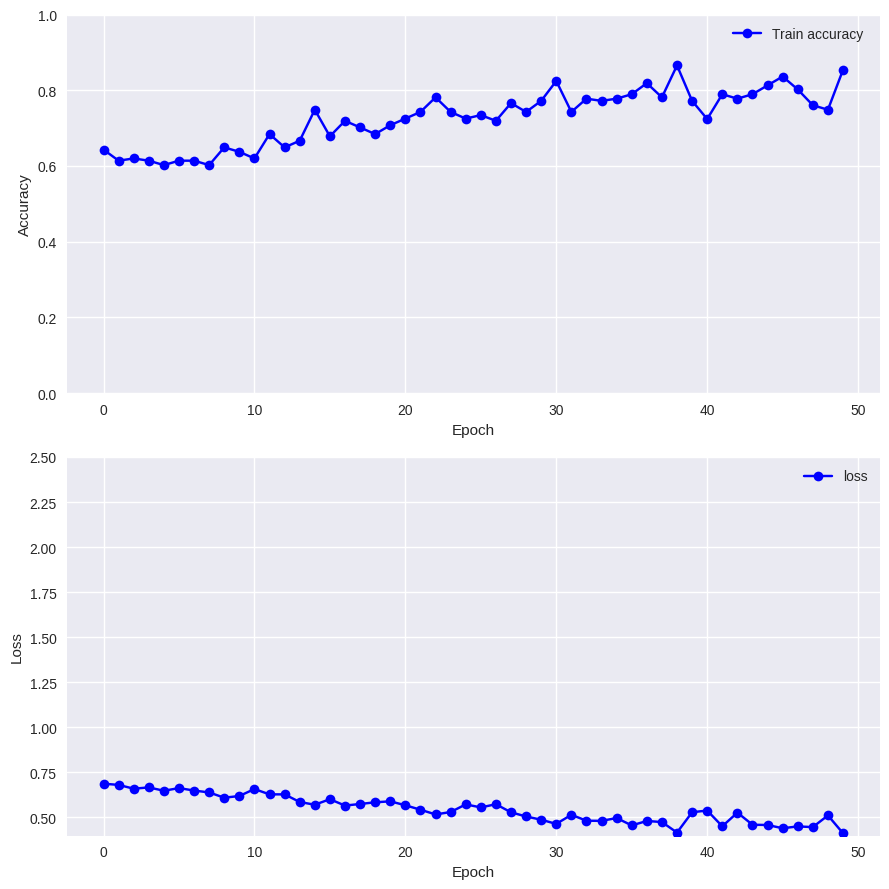

In [29]:
import matplotlib.pyplot as plt

plt.style.use("seaborn")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 9))

ax1.plot(history.history["binary_accuracy"], "-ob", label="Train accuracy ")
# ax1.plot(history.history["acc"], "-og", label="Train accuracy With quantum layer")
# ax1.plot(c_history.history["val_accuracy"], "-og", label="Without quantum layer")
ax1.set_ylabel("Accuracy")
ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(history.history["loss"], "-ob", label="loss")
# ax2.plot(c_history.history["val_loss"], "-og", label="Without quantum layer")
ax2.set_ylabel("Loss")
ax2.set_ylim(top=2.5)
ax2.set_xlabel("Epoch")
ax2.legend()
plt.tight_layout()
plt.show()

2/2 [==============================] - 1s 203ms/step


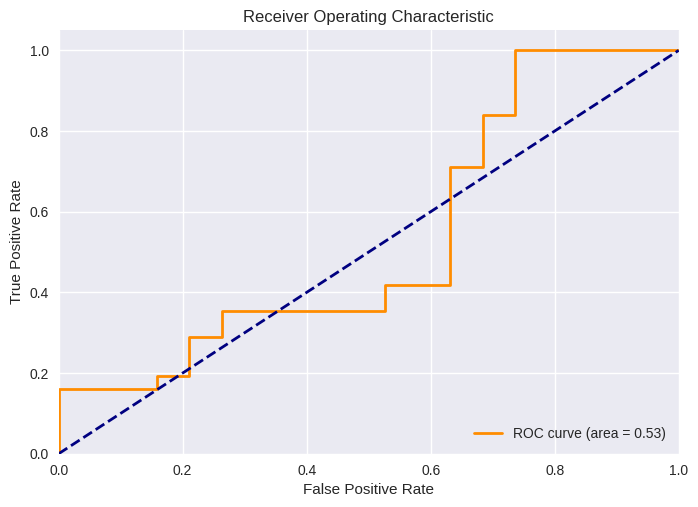

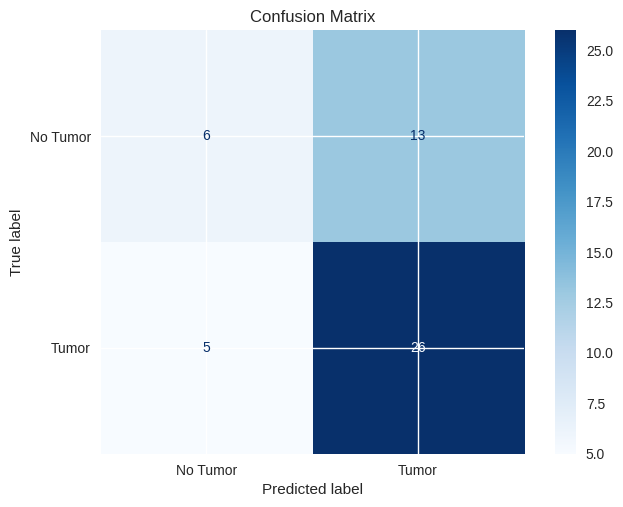

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Make predictions on the validation data
valid_preds = model.predict(valid_data)
y_valid_true = valid_data.classes

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_valid_true, valid_preds[:, 1])
roc_auc = auc(fpr, tpr)
# print(accuracy_score(y_valid_true, valid_preds))
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Calculate confusion matrix
y_valid_pred = np.argmax(valid_preds, axis=1)
cm = confusion_matrix(y_valid_true, y_valid_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Tumor', 'Tumor'])
disp.plot(cmap=plt.cm.Blues
          )
plt.title('Confusion Matrix')
plt.show()
